In [1]:
from sim_core.engine import Engine
from sim_core.car import Car
from sim_core.autoTransmission import AutoTransmission
from sim_core.utils import ms_to_kph, example_torque_curve

engine = Engine(
    ratio_gears=[3.5, 2.8, 2.1, 1.7, 1.3, 1],
    ratio_differential=4,
    torque_output = example_torque_curve,
    max_rpm=10000,
    min_rpm=500,
    idle_rpm=2000
)

car = Car(
    mass=700,
    radius_wheel=0.3,
    engine=engine
)

auto_transmission = AutoTransmission(
    car.engine,
    8000,
    3000
)

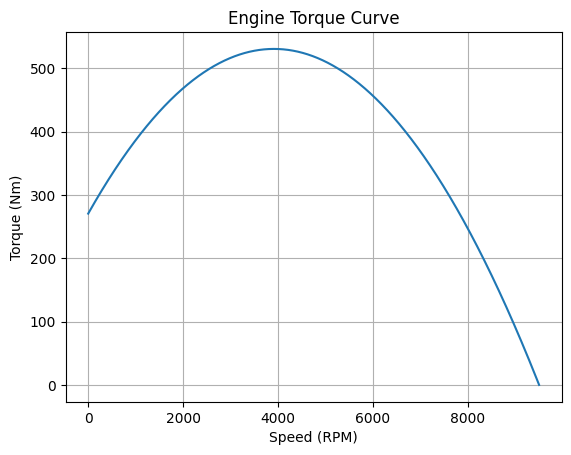

In [2]:
from sim_core.utils import plot_torque_curve

fig, ax = plot_torque_curve(car.engine)
fig.savefig('fig/engine_torque_curve.svg', format='svg')

In [12]:
import numpy as np

def sim_acceleration(car, duration_seconds, gear, tick_interval=0.1, auto_shift=None):
    car.reset()
    for g in range(gear):
        car.engine.upshift()
    duration = (np.arange(duration_seconds * 10) + 1) / 10
    rpm_values = []
    speed_values = []

    for i in duration:
        speed_values = np.append(speed_values, ms_to_kph(car.speed))
        rpm_values = np.append(rpm_values, car.engine._rpm)
        car.accelerate(tick_interval)
        if auto_shift:
            auto_shift.update()
    
    car.reset()
    return rpm_values, speed_values, duration

def plot_gear_perf(car, duration, gear, label, speed_ax, rpm_ax, auto_shift=None):
    rpm_values, speed_values, seconds = sim_acceleration(car, duration, gear, auto_shift=auto_shift)
    speed_ax.plot(seconds, speed_values, label=label)
    rpm_ax.plot(seconds, rpm_values)
    return speed_ax, rpm_ax

gear => 1
down
gear => 1
down
gear => 1
down
gear => 1
down
gear => 1
down
gear => 1
down
gear => 1
down
gear => 1
down
gear => 1
down
gear => 1
down
gear => 1
gear => 1
gear => 1
gear => 1
gear => 1
gear => 1
gear => 1
gear => 1
gear => 1
gear => 1
gear => 1
gear => 1
gear => 1
gear => 1
gear => 1
gear => 1
up
gear => 2
gear => 2
gear => 2
gear => 2
gear => 2
gear => 2
gear => 2
gear => 2
gear => 2
up
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
gear => 3
up
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
gear => 4
up
gear => 5
gear => 5
gear => 5
gear => 5
gear => 5
gear => 5
gear => 5
gear => 5
gear => 5
gear => 5
gear => 5
gear => 5
gear => 5
gear => 5
gear => 5
gear => 5
gear => 5
gear => 

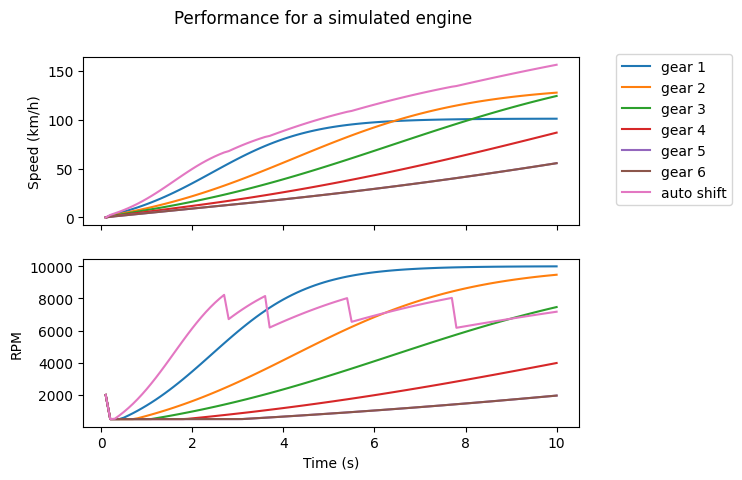

In [14]:
import matplotlib.pyplot as plt

duration = 10

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

fig.suptitle('Performance for a simulated engine')

for i in range(len(car.engine.ratio_gears)):
    ax1, ax2 = plot_gear_perf(car, duration, i + 1, f'gear {i + 1}',ax1, ax2)

ax1, ax2 = plot_gear_perf(car, duration, 0, f'auto shift',ax1, ax2, auto_shift=auto_transmission)

ax1.set_ylabel('Speed (km/h)')
ax2.set_ylabel('RPM')
ax2.set_xlabel('Time (s)')
fig.legend(bbox_to_anchor=(1.15, 0.9))
fig.savefig('fig/engine_performance_all_gear.svg', format='svg')

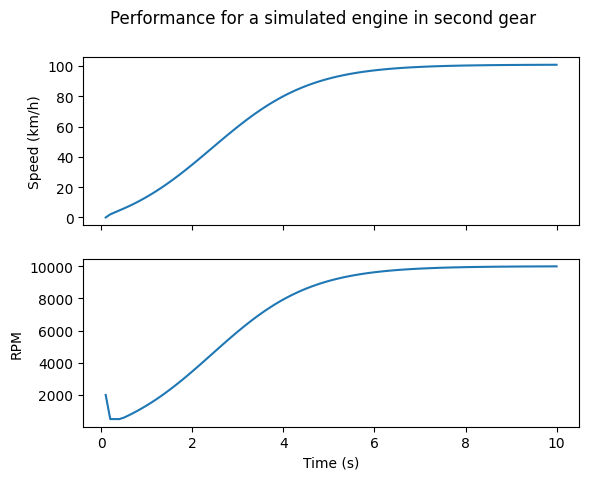

In [5]:
import numpy as np

car.reset()

ten_seconds = (np.arange(100) + 1) / 10 # Time step every 0.1s up to 10 seconds

rpm_values_1 = []
speed_values_1 = []

car.engine.upshift()

for i in ten_seconds:
    speed_values_1 = np.append(speed_values_1, ms_to_kph(car.speed))
    rpm_values_1 = np.append(rpm_values_1, car.engine._rpm)
    car.accelerate(0.1) # Move the time 0.1s forward

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

fig.suptitle('Performance for a simulated engine in second gear')

ax1.plot(ten_seconds, speed_values_1)
ax1.set_ylabel('Speed (km/h)')
ax2.plot(ten_seconds, rpm_values_1)
ax2.set_ylabel('RPM')
ax2.set_xlabel('Time (s)')
fig.savefig('fig/engine_performance_second_gear.svg', format='svg')